In [5]:
import cv2
import numpy as np
from scipy import misc
imagem = misc.ascent()

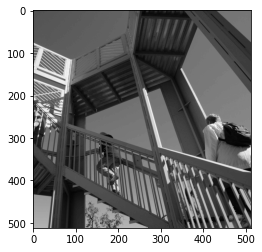

In [24]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.imshow(imagem)
plt.show()

In [8]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filters = [[ [0, 1, 0], [1, -4, 1], [0, 1, 0]] ,[ [-1, -2, -1], [0, 0, 0], [1, 2, 1]], [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [ ]:
"""
 # Soluçãão do tensorflow
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel
"""

In [42]:
def aplicando_filtro(imagem,filter, weight  = 1):
  i_transformed = np.copy(imagem)
  size_x = i_transformed.shape[0]
  size_y = i_transformed.shape[1]

  metade_filtro = len(filter)//2 # divisao inteira
  size_x -= metade_filtro # margem de seguranca para o filtro não sair do tamanho da imagem, exemplo: se filtro é 3x3 o pixel mais externo a receber o filtro tem que estar a 1 pixel do limite da imagem caso seja 5x5 tem que estar a 2
  size_y -= metade_filtro # idem
  iter_filtro = [i for i in range(-metade_filtro,metade_filtro+1)] # exemplo (3x3) = [-1,0,1]
  tam_filtro = [i for i in range(len(filter))]

  indice_filtro_fixo = [] # Nao vai variar depois de criado
  for i in tam_filtro:
    for j in tam_filtro:
      indice_filtro_fixo.append((i,j)) # cria algo como [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)] se fosse para 3x3

  for x in range(metade_filtro,size_x): # exemplo: se 3x3 range(1,size_x-1)
    for y in range(metade_filtro,size_y):
        output_pixel = 0.0
        indice_filtro = iter(indice_filtro_fixo) 
        for i in iter_filtro:
          for j in iter_filtro:# filtro é nXn
            indice_x_imagem = x+ j # j[1] == -1 ou 0 ou 1
            indice_y_imagem = y+ i # i[1] == -1 ou 0 ou 1
            (indice_x_filtro,indice_y_filtro) = next(indice_filtro)
            output_pixel += (imagem[indice_x_imagem,indice_y_imagem] * filter[indice_x_filtro][indice_y_filtro])
            #print("Pixel {},{} imagem[{},{}] += filter[{}][{}]".format(x,y,indice_x_imagem,indice_y_imagem,indice_x_filtro,indice_y_filtro))
        if(output_pixel<0):
          output_pixel=0
        if(output_pixel>255):
          output_pixel=255
        i_transformed[x, y] = output_pixel
  return i_transformed

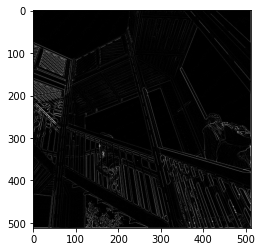

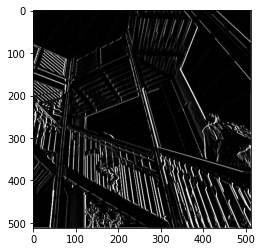

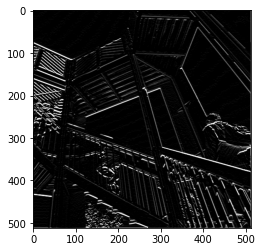

In [43]:
filters = [[ [0, 1, 0], [1, -4, 1], [0, 1, 0]] ,[ [-1, -2, -1], [0, 0, 0], [1, 2, 1]], [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]
for filter in filters:
  imagem_transformada = aplicando_filtro(imagem,filter)
  plt.grid(False)
  plt.gray()
  #plt.axis('off')
  plt.imshow(imagem_transformada)
  plt.show()

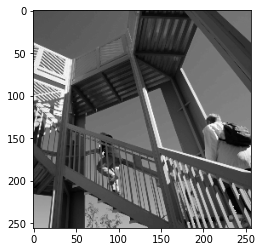

In [45]:
i_transformed = np.copy(imagem)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [58]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1) #60000 images in a 28X28
test_images = test_images.reshape(10000, 28, 28, 1)
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {.2f}'.format(test_loss, test_accuracy*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

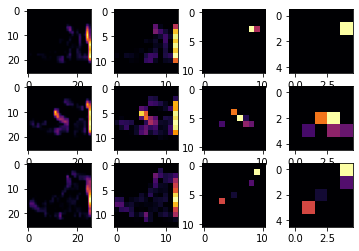

In [60]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

9. Exercises

    <p>Try editing the convolutions.
    Change the number of convolutions from 32 to either 16 or 64. What impact will this have on accuracy and/or training time?<br>
    <p>Remove the final convolution. What impact will this have on accuracy or training time?<br>
    <p>How about adding more convolutions? What impact do you think this will have? Experiment with it.<br>
    <p>Remove all convolutions but the first. What impact do you think this will have? Experiment with it.<br>
    <p>In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

